In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
unemployment = pd.read_csv('Unemployment in India.csv')

### Estimated Unemployment Rate
refers to the percentage of the labor force that is unemployed and actively seeking employment.

### Estimated Employed
refers to the estimated number of people who are currently employed within a given population or workforce

### Estimated Labour Participation Rate (%)
 The estimated labor participation rate refers to the percentage of the working-age population (typically individuals aged 15 years and older) that is either employed or actively seeking employment. It is a measure used to gauge the extent to which the population is engaged in the labor force and can provide insights into the overall health of the economy.

`Labor Participation Rate = (Labor Force / Working-Age Population) * 100`

In [3]:
unemployment.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural

In [4]:
unemployment = unemployment.dropna()

In [5]:
df = unemployment.rename(columns={unemployment.columns[0]:'State',unemployment.columns[3]:'EUR',unemployment.columns[4]:'EE', unemployment.columns[5]:'ELPR', unemployment.columns[6]:'Region'})
df.head()

State         Date  Frequency   EUR          EE   ELPR Region
0  Andhra Pradesh   31-05-2019    Monthly  3.65  11999139.0  43.24  Rural
1  Andhra Pradesh   30-06-2019    Monthly  3.05  11755881.0  42.05  Rural
2  Andhra Pradesh   31-07-2019    Monthly  3.75  12086707.0  43.50  Rural
3  Andhra Pradesh   31-08-2019    Monthly  3.32  12285693.0  43.97  Rural
4  Andhra Pradesh   30-09-2019    Monthly  5.17  12256762.0  44.68  Rural

In [6]:
df["State"].unique()
df['State'] = df['State'].apply(lambda x:x.replace(" ","_"));

In [7]:
region_stats = df.groupby(['State'])[['EUR','EE','ELPR']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

State    EUR           EE   ELPR
0     Andhra_Pradesh   7.48   8154093.18  39.38
1              Assam   6.43   5354772.15  44.87
2              Bihar  18.92  12366189.14  38.15
3         Chandigarh  15.99    316831.25  39.34
4       Chhattisgarh   9.24   4303498.57  42.81
5              Delhi  16.50   2627512.86  38.93
6                Goa   9.27    226308.33  39.25
7            Gujarat   6.66  11402012.79  46.10
8            Haryana  26.28   3557072.46  42.74
9   Himachal_Pradesh  18.54   1059823.71  44.22
10   Jammu_&_Kashmir  16.19   1799931.67  41.03
11         Jharkhand  20.58   4469240.43  41.67
12         Karnataka   6.68  10667119.29  41.35
13            Kerala  10.12   4425899.50  34.87
14    Madhya_Pradesh   7.41  11115484.32  38.82
15       Maharashtra   7.56  19990195.86  42.30
16         Meghalaya   4.80    689736.81  57.08
17            Odisha   5.66   6545746.96  38.93
18        Puducherry  10.22    212278.08  38.99
19            Punjab  12.03   4539362.00  41.14
20         Rajasthan  14.06  10041064.75  39.97
21            Sikkim   7.25    106880.71  46.07
22        Tamil_Nadu   9.28  12269546.75  40.87
23         Telangana   7.74   7939662.75  53.00
24           Tripura  28.35    717002.64  61.82
25     Uttar_Pradesh  12.55  28094832.18  39.43
26       Uttarakhand   6.58   1390228.11  33.78
27       West_Bengal   8.12  17198538.00  45.42

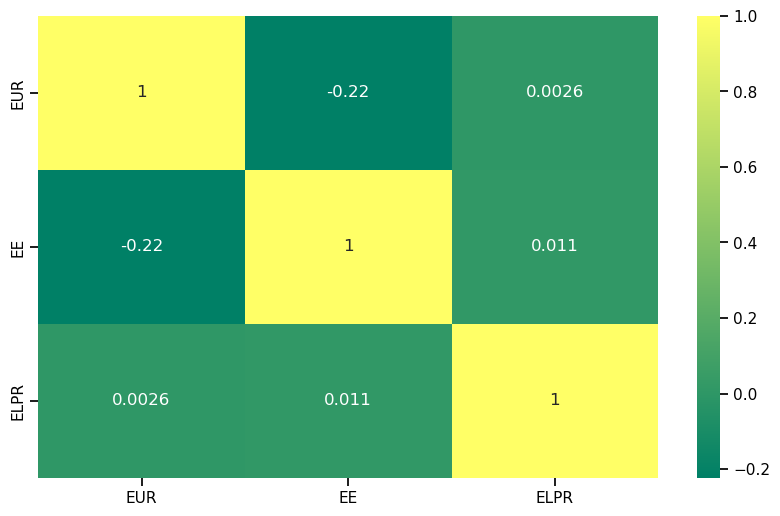

In [8]:
heat_maps = df[['EUR','EE', 'ELPR']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

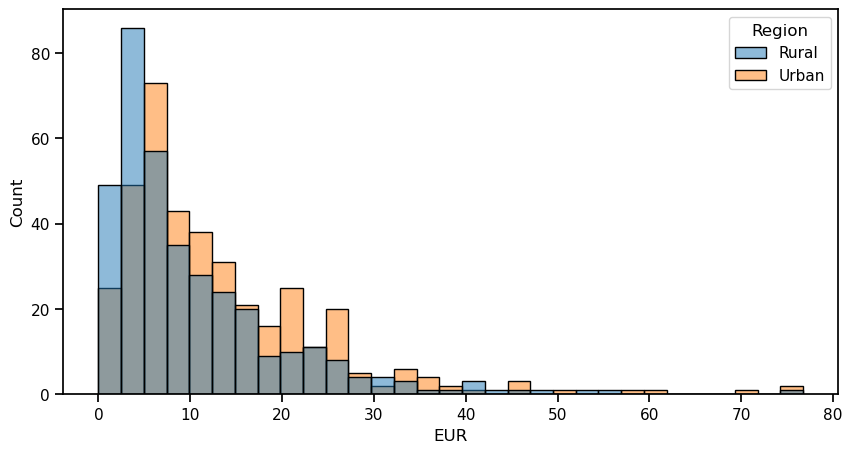

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='EUR',hue='Region');

In [10]:
import plotly.express as px
region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()
fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Text(0.5, 1.0, 'Estimated Unemployment Rate')

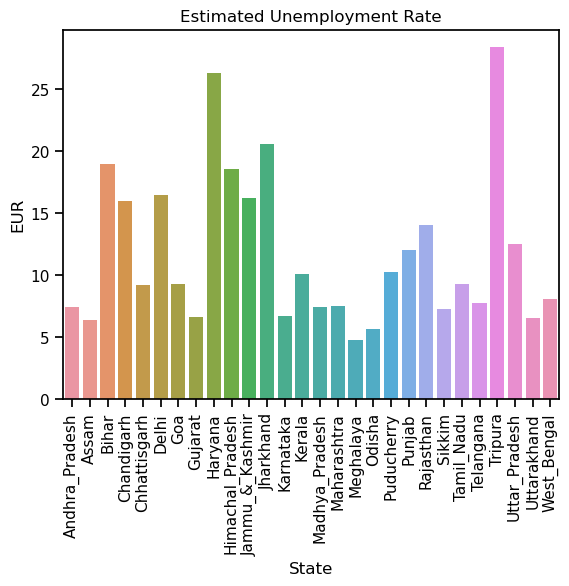

In [11]:
# plt.xticks(ticks='vertical')
g =sns.barplot(region_stats,x='State',y='EUR')
g.set_xticklabels(labels=region_stats['State'],rotation=90);
plt.title('Estimated Unemployment Rate')

Text(0.5, 1.0, 'Estimated Employed')

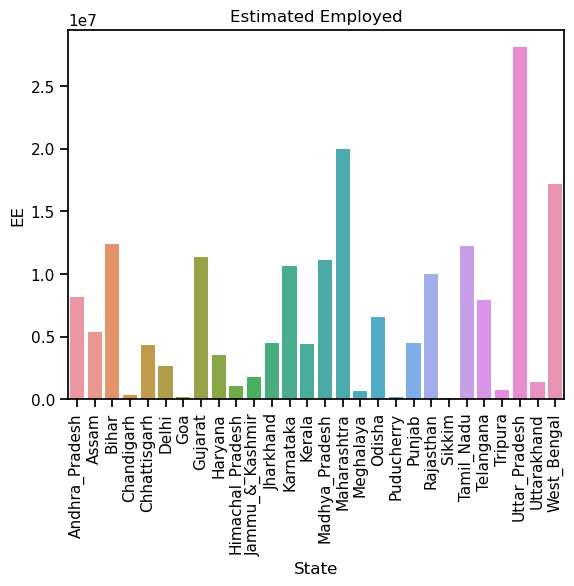

In [12]:
g =sns.barplot(region_stats,x='State',y='EE')
g.set_xticklabels(labels=region_stats['State'],rotation=90);
plt.title('Estimated Employed')

Text(0.5, 1.0, 'Estimated Labour Participation Rate (%)')

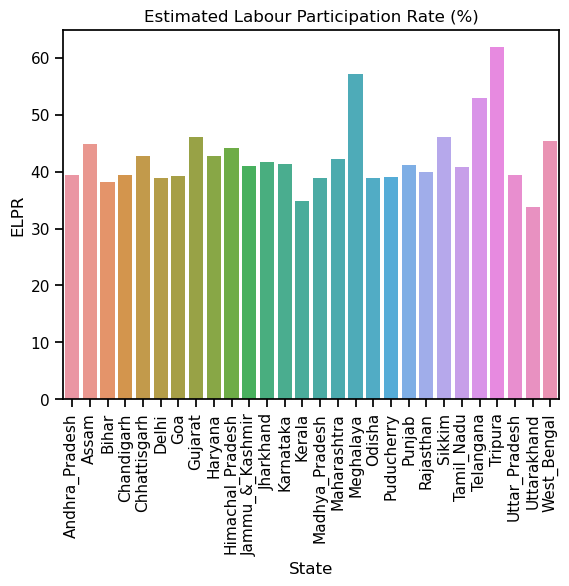

In [13]:
g =sns.barplot(region_stats,x='State',y='ELPR')
g.set_xticklabels(labels=region_stats['State'],rotation=90);
plt.title('Estimated Labour Participation Rate (%)')

In [44]:
df['Date'] = pd.DatetimeIndex(df[' Date'])
df['year'] = pd.DatetimeIndex(df[' Date']).year
df['month'] =pd.DatetimeIndex( df[' Date']).month
df['time'] = pd.to_datetime(df[['month','year']].assign(DAY=1))

In [45]:
Andhra_Pradesh =  df[df['State'] == 'Andhra_Pradesh'].reset_index(drop=True)

In [46]:
Andhra_Pradesh.head()

State         Date  Frequency   EUR          EE   ELPR Region  \
0  Andhra_Pradesh   31-05-2019    Monthly  3.65  11999139.0  43.24  Rural   
1  Andhra_Pradesh   30-06-2019    Monthly  3.05  11755881.0  42.05  Rural   
2  Andhra_Pradesh   31-07-2019    Monthly  3.75  12086707.0  43.50  Rural   
3  Andhra_Pradesh   31-08-2019    Monthly  3.32  12285693.0  43.97  Rural   
4  Andhra_Pradesh   30-09-2019    Monthly  5.17  12256762.0  44.68  Rural   

        Date  month  year       time  
0 2019-05-31      5  2019 2019-05-01  
1 2019-06-30      6  2019 2019-06-01  
2 2019-07-31      7  2019 2019-07-01  
3 2019-08-31      8  2019 2019-08-01  
4 2019-09-30      9  2019 2019-09-01

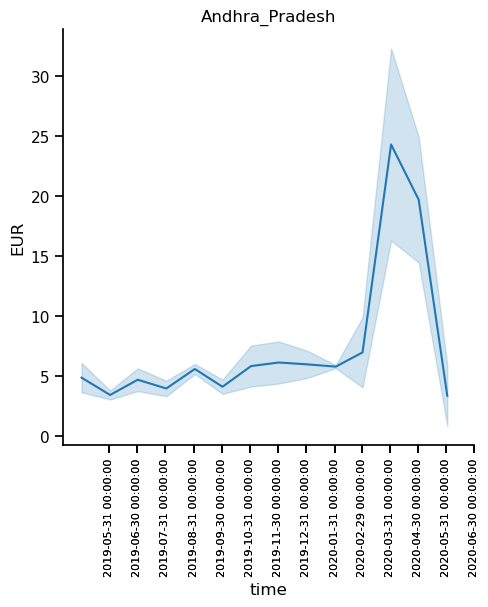

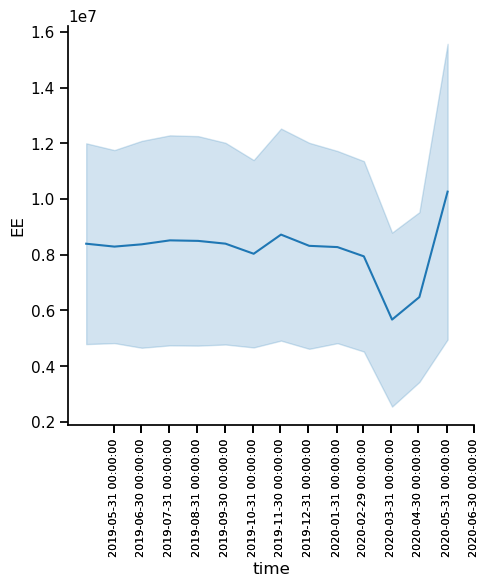

In [47]:
g = sns.relplot(data=Andhra_Pradesh, kind="line",x="time", y="EUR")
plt.xticks(ticks=Andhra_Pradesh['Date'],labels=Andhra_Pradesh['Date'], rotation=90,fontsize=8);
plt.title('Andhra_Pradesh')
g = sns.relplot(data=Andhra_Pradesh, kind="line",x="time", y="EE")
plt.xticks(ticks=Andhra_Pradesh['Date'],labels=Andhra_Pradesh['Date'], rotation=90,fontsize=8);

In [29]:
state_list = df['State'].unique().tolist()

In [30]:
def opration(ls):
#     ls[1] = df[df['State'] == ls[1]].reset_index(drop=True)
    print(ls[1])

In [31]:
df

State         Date  Frequency    EUR          EE   ELPR Region  \
0    Andhra_Pradesh   31-05-2019    Monthly   3.65  11999139.0  43.24  Rural   
1    Andhra_Pradesh   30-06-2019    Monthly   3.05  11755881.0  42.05  Rural   
2    Andhra_Pradesh   31-07-2019    Monthly   3.75  12086707.0  43.50  Rural   
3    Andhra_Pradesh   31-08-2019    Monthly   3.32  12285693.0  43.97  Rural   
4    Andhra_Pradesh   30-09-2019    Monthly   5.17  12256762.0  44.68  Rural   
..              ...          ...        ...    ...         ...    ...    ...   
749     West_Bengal   29-02-2020    Monthly   7.55  10871168.0  44.09  Urban   
750     West_Bengal   31-03-2020    Monthly   6.67  10806105.0  43.34  Urban   
751     West_Bengal   30-04-2020    Monthly  15.63   9299466.0  41.20  Urban   
752     West_Bengal   31-05-2020    Monthly  15.22   9240903.0  40.67  Urban   
753     West_Bengal   30-06-2020    Monthly   9.86   9088931.0  37.57  Urban   

          Date  month  
0   2019-05-31      5  
1   2019-06-30      6  
2   2019-07-31      7  
3   2019-08-31      8  
4   2019-09-30      9  
..         ...    ...  
749 2020-02-29      2  
750 2020-03-31      3  
751 2020-04-30      4  
752 2020-05-31      5  
753 2020-06-30      6  

[740 rows x 9 columns]

C:\Users\user\Desktop\Python\env\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 1000x500 with 0 Axes>

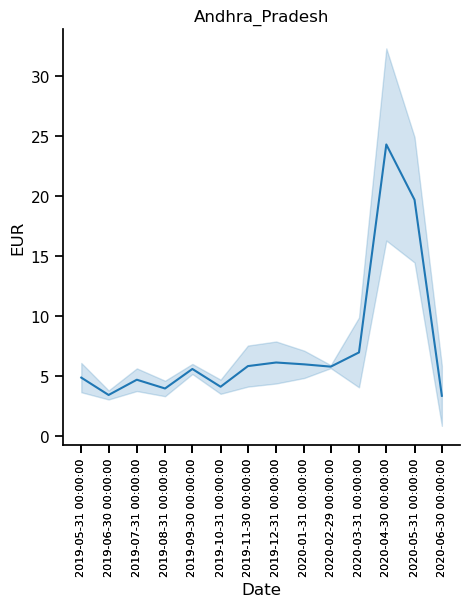

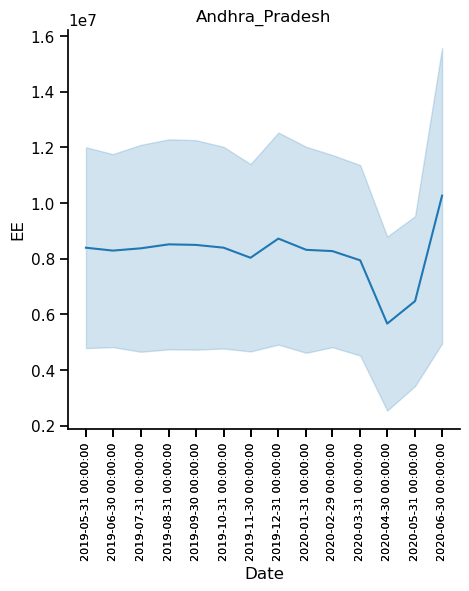

<Figure size 1000x500 with 0 Axes>

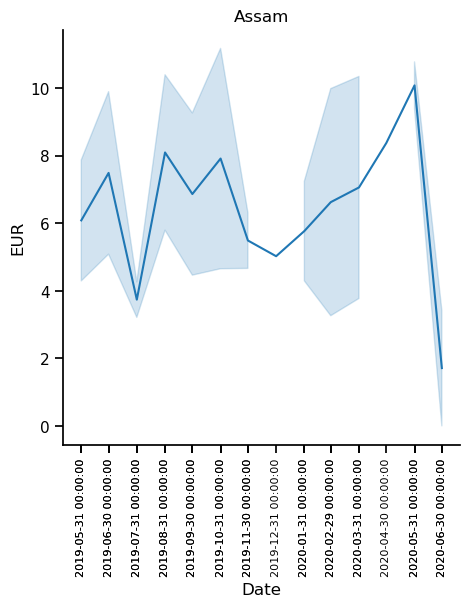

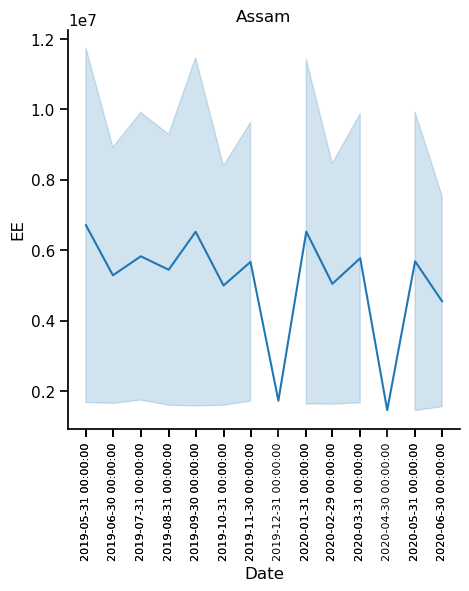

<Figure size 1000x500 with 0 Axes>

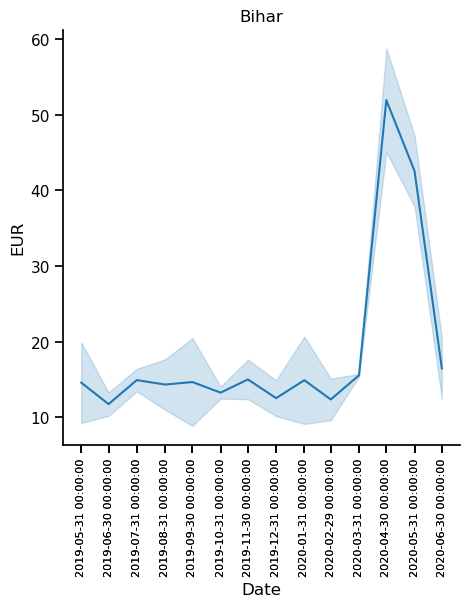

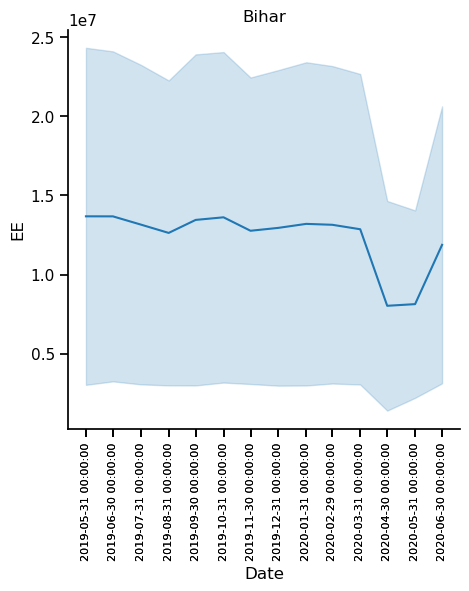

<Figure size 1000x500 with 0 Axes>

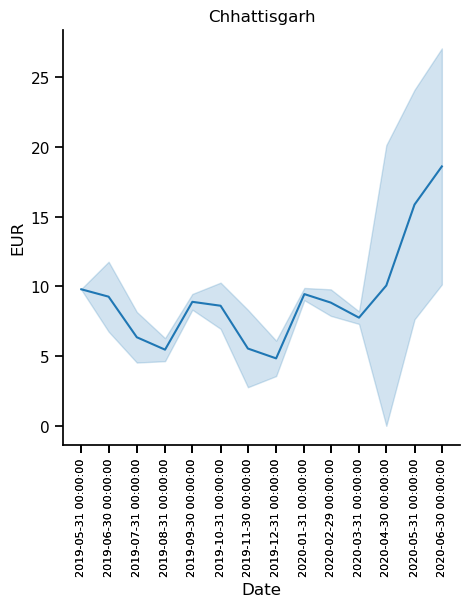

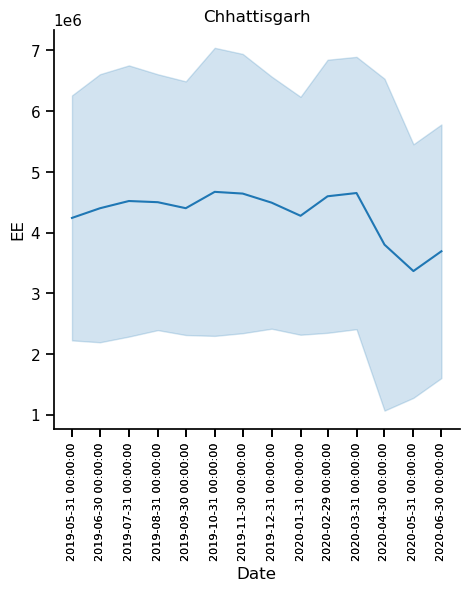

<Figure size 1000x500 with 0 Axes>

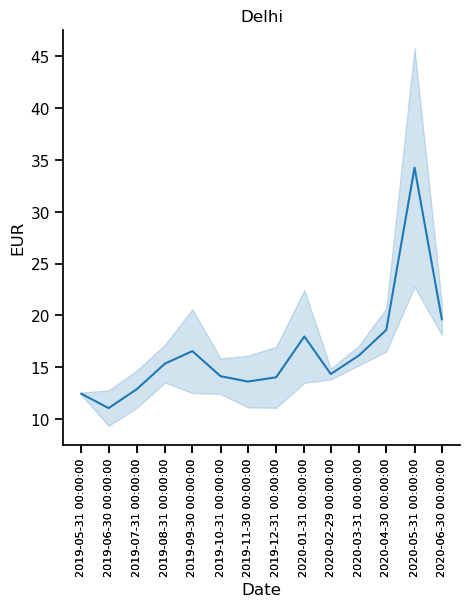

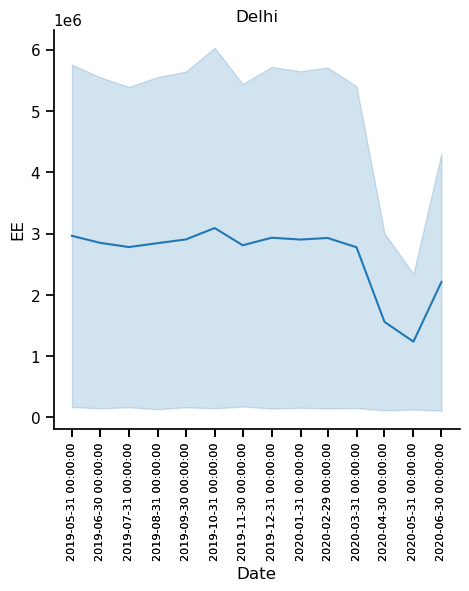

<Figure size 1000x500 with 0 Axes>

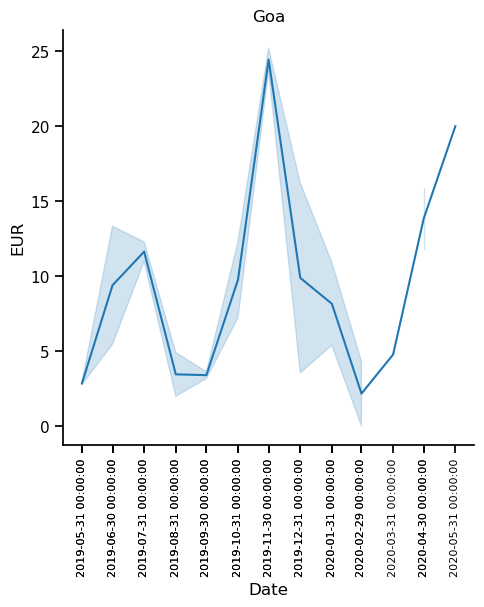

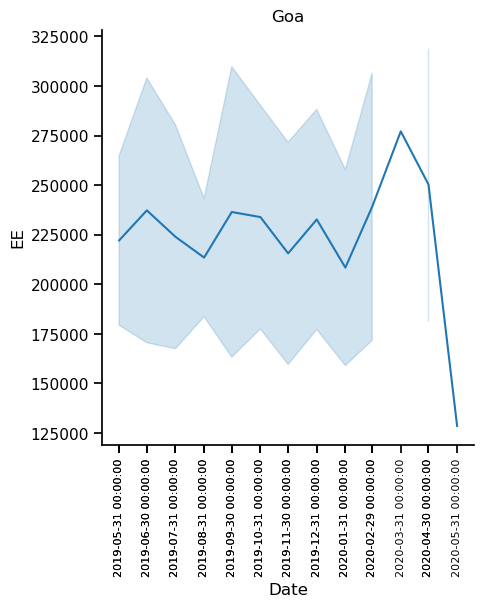

<Figure size 1000x500 with 0 Axes>

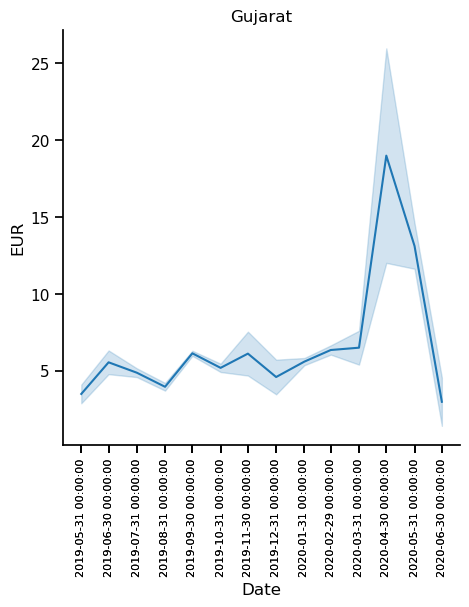

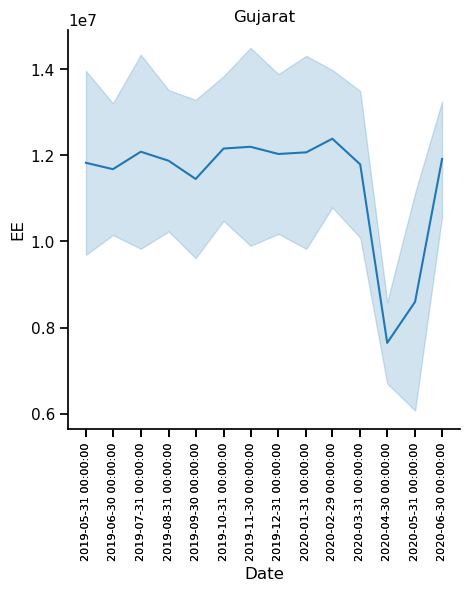

<Figure size 1000x500 with 0 Axes>

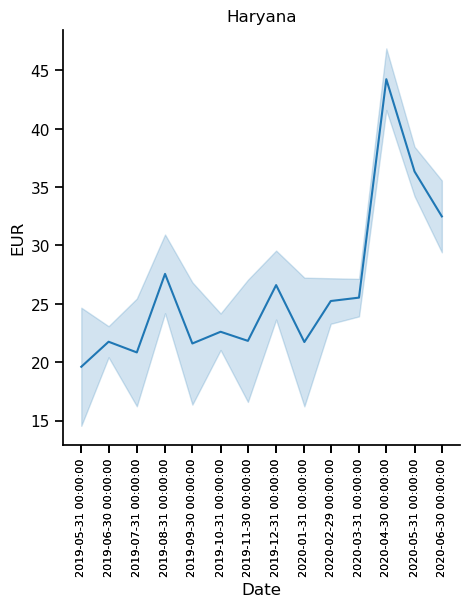

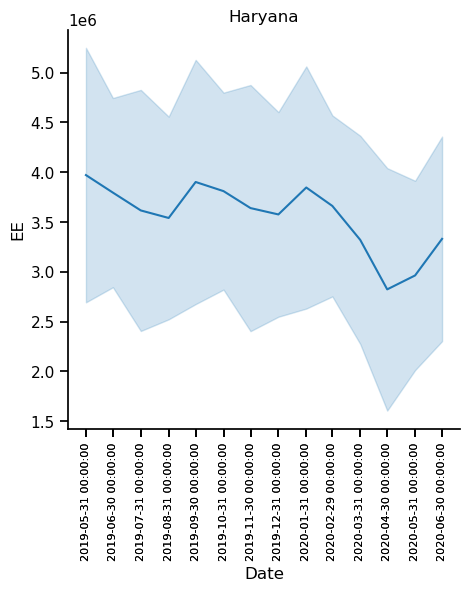

<Figure size 1000x500 with 0 Axes>

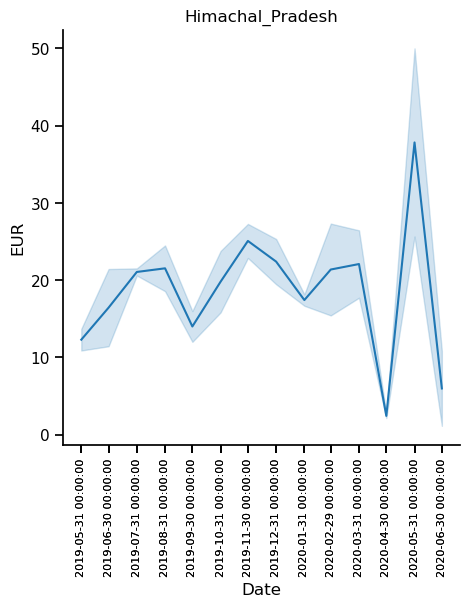

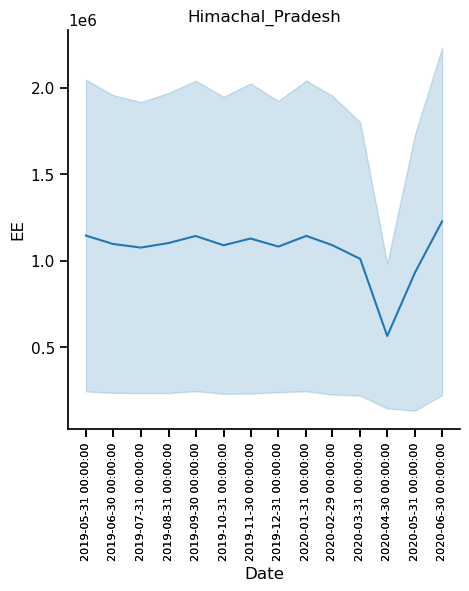

<Figure size 1000x500 with 0 Axes>

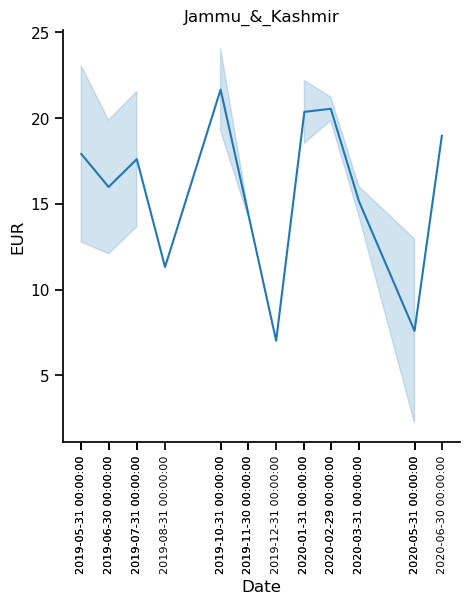

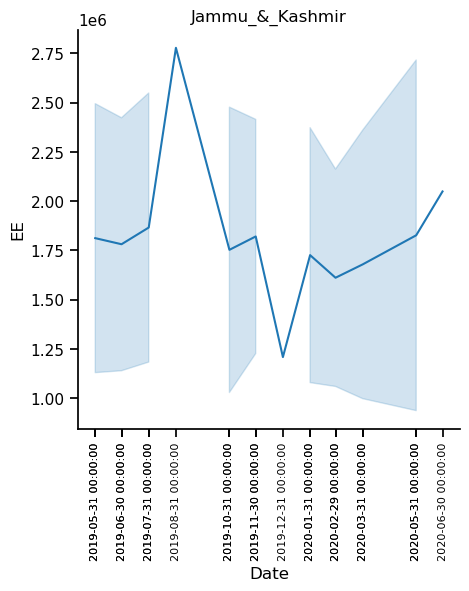

<Figure size 1000x500 with 0 Axes>

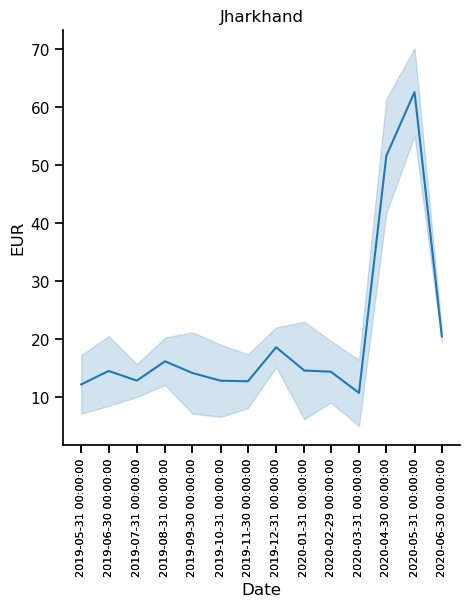

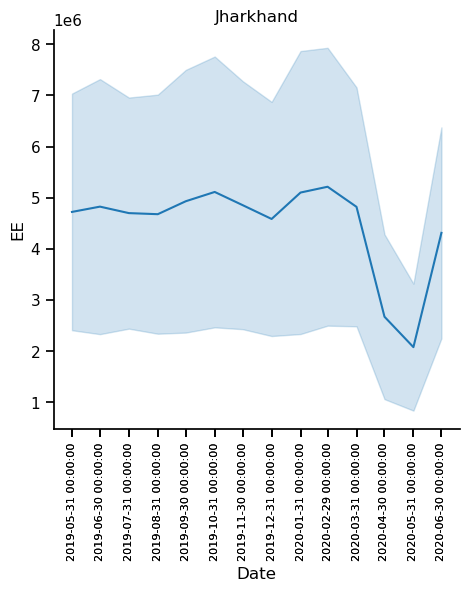

<Figure size 1000x500 with 0 Axes>

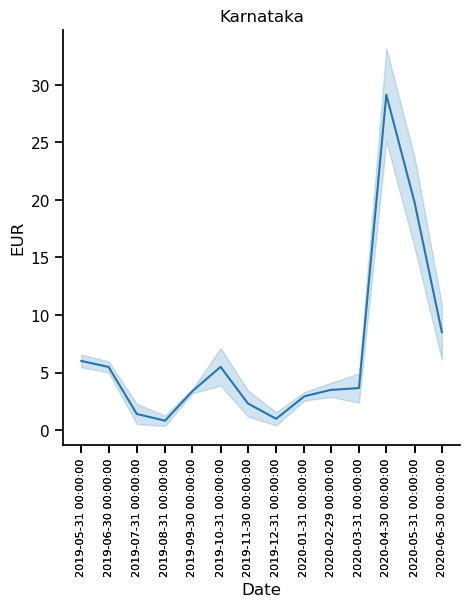

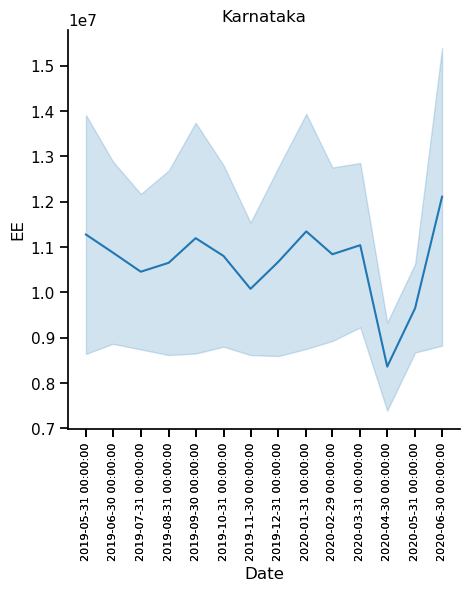

<Figure size 1000x500 with 0 Axes>

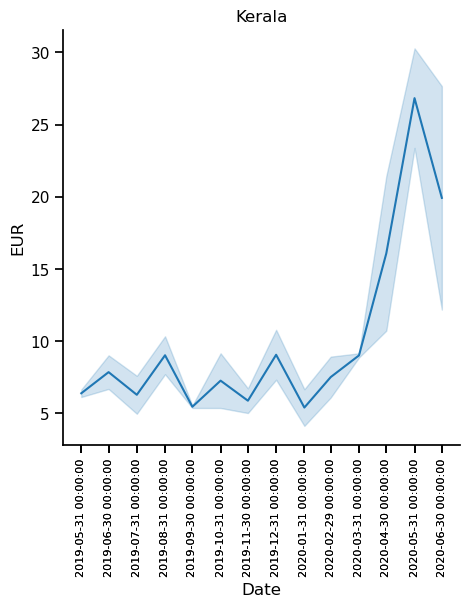

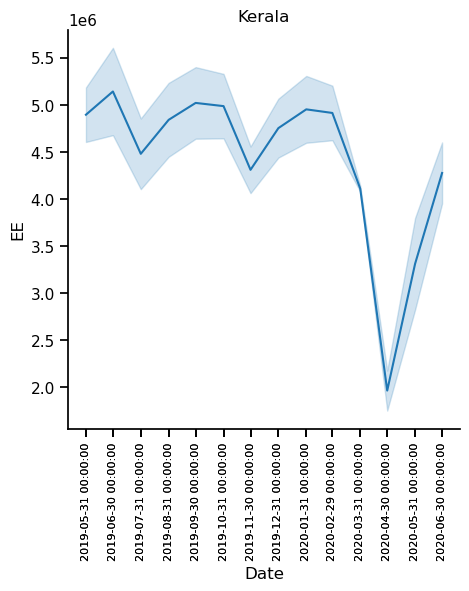

<Figure size 1000x500 with 0 Axes>

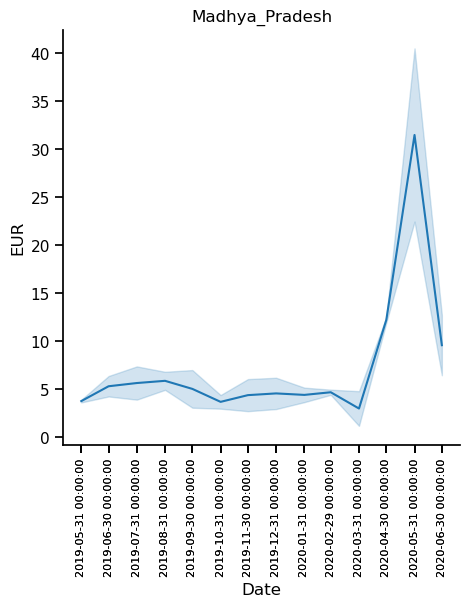

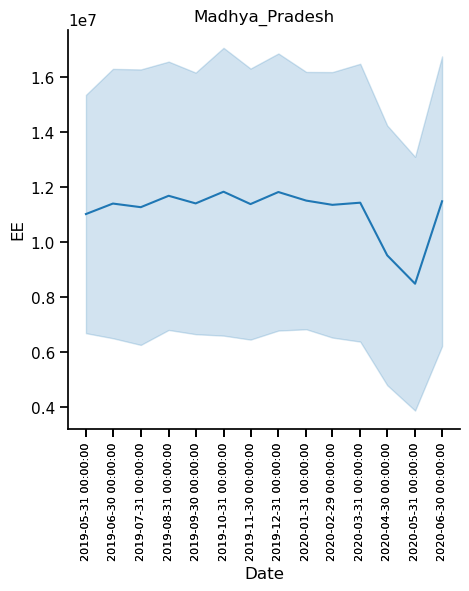

<Figure size 1000x500 with 0 Axes>

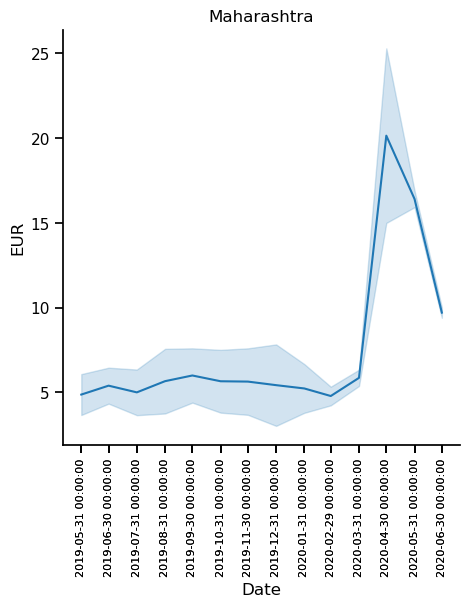

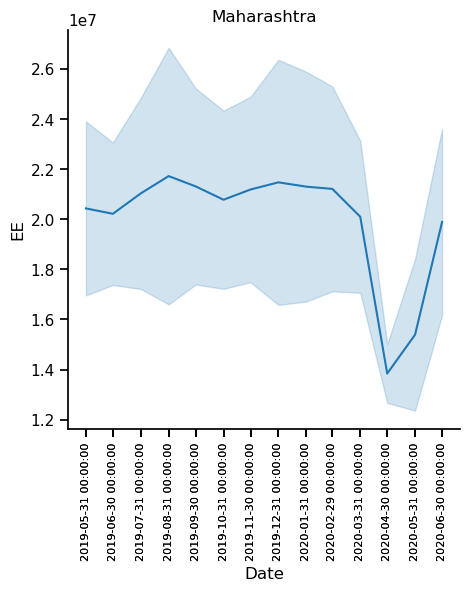

<Figure size 1000x500 with 0 Axes>

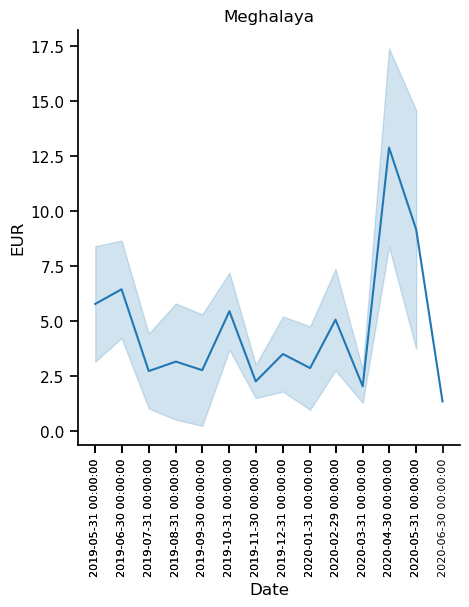

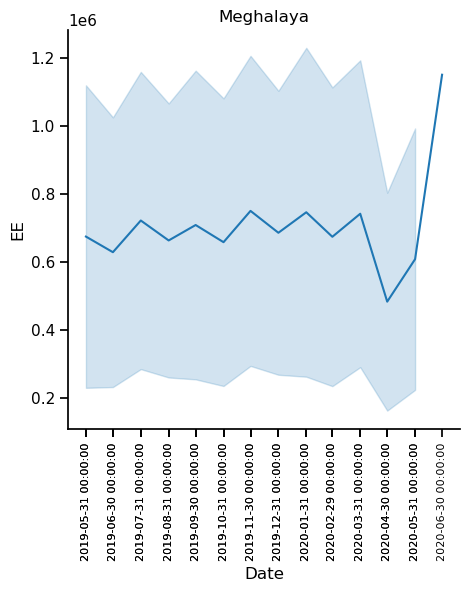

<Figure size 1000x500 with 0 Axes>

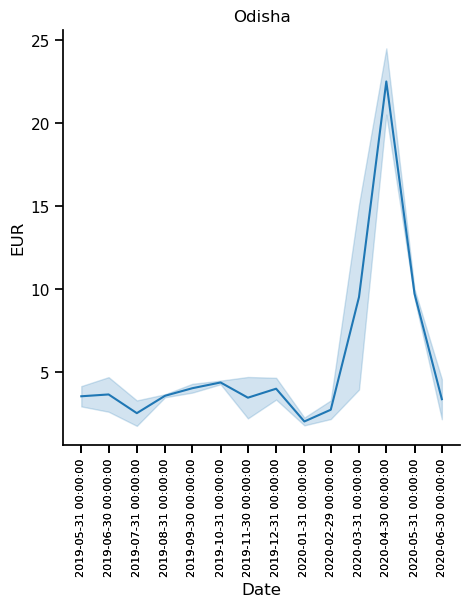

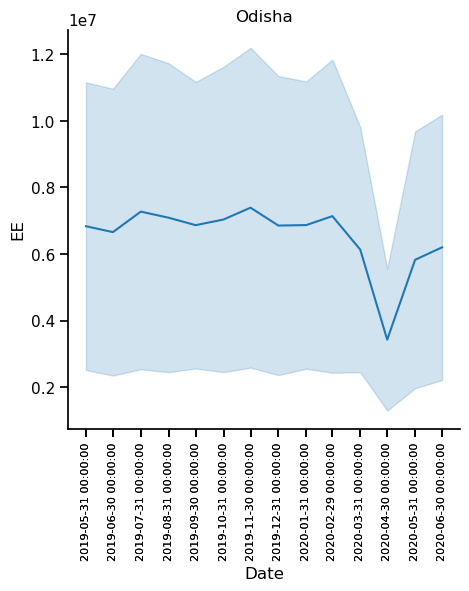

<Figure size 1000x500 with 0 Axes>

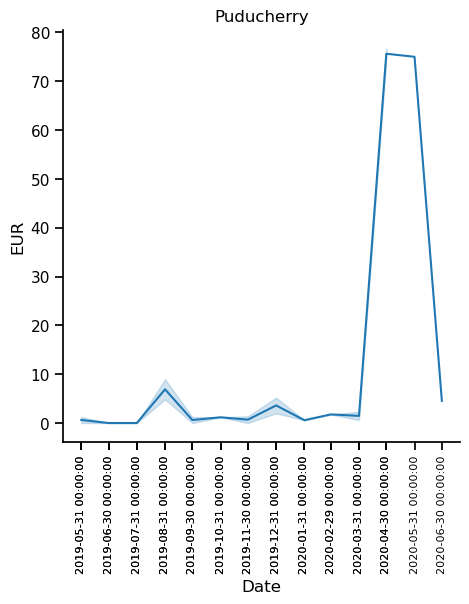

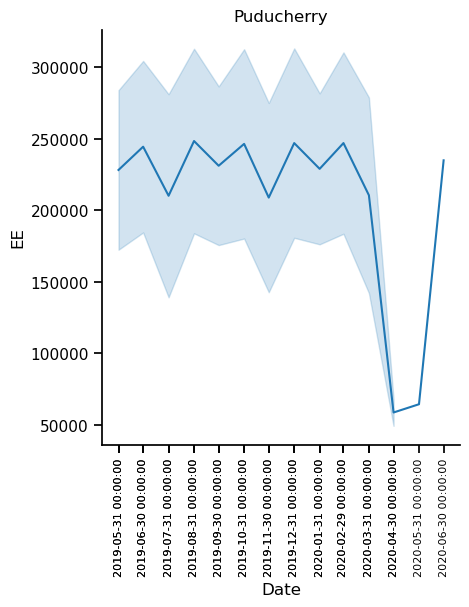

<Figure size 1000x500 with 0 Axes>

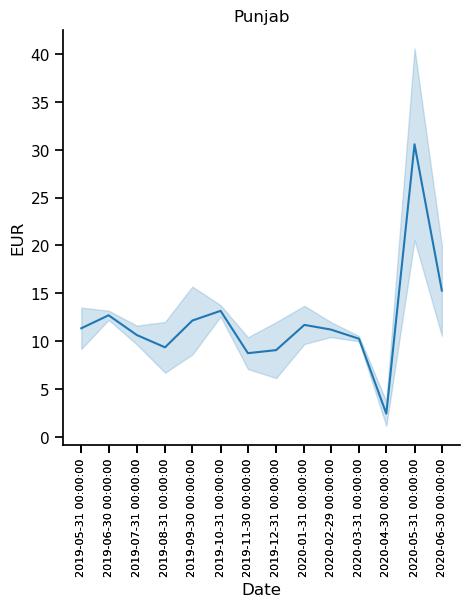

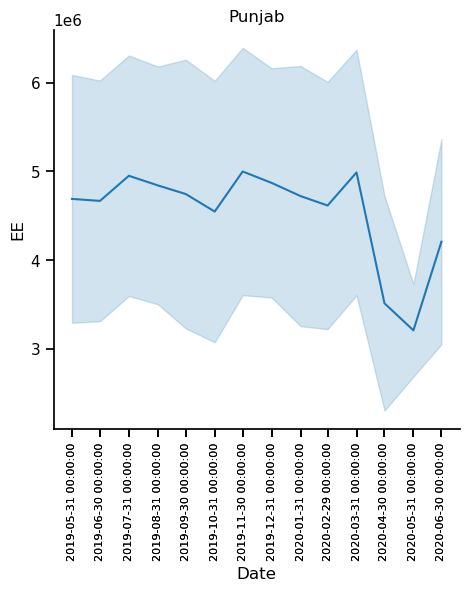

<Figure size 1000x500 with 0 Axes>

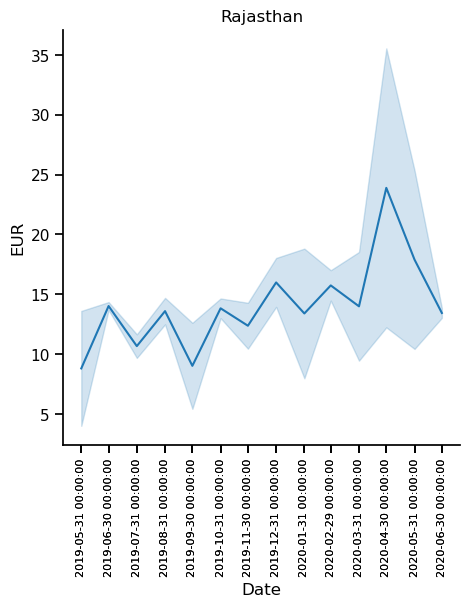

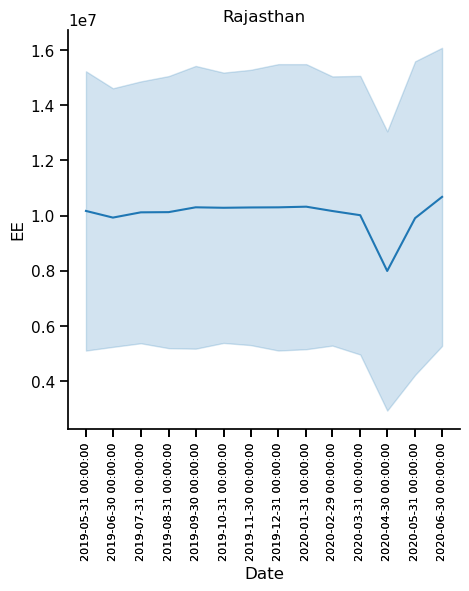

<Figure size 1000x500 with 0 Axes>

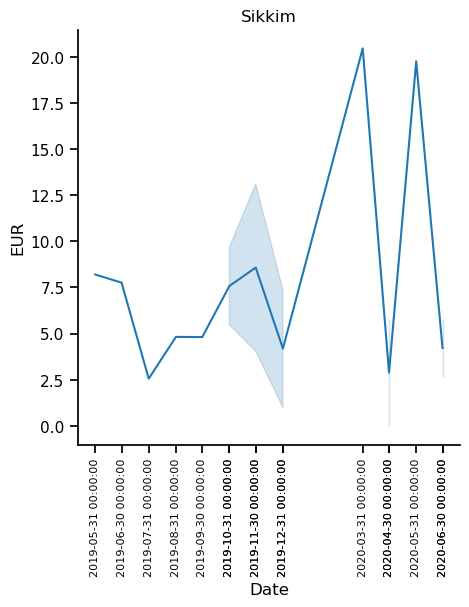

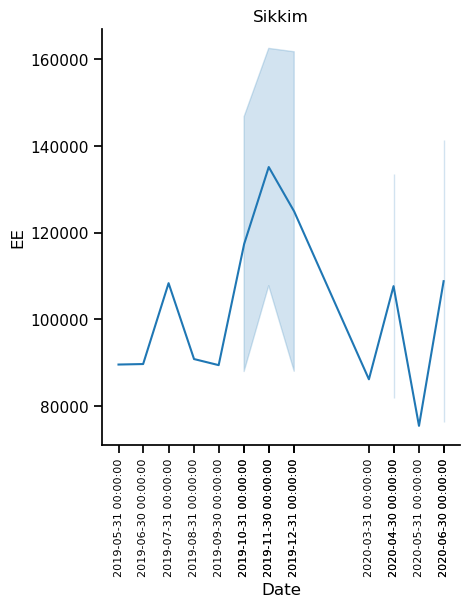

<Figure size 1000x500 with 0 Axes>

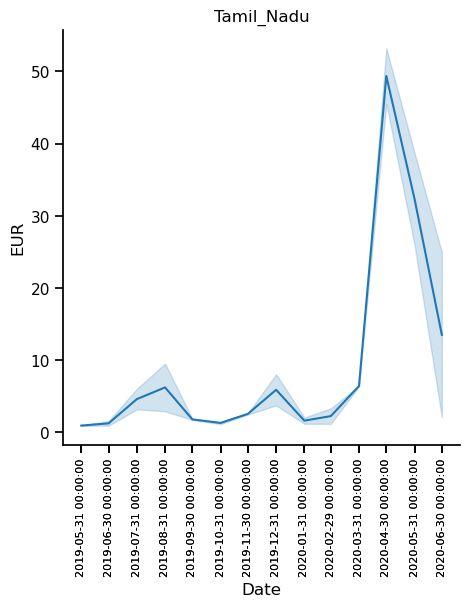

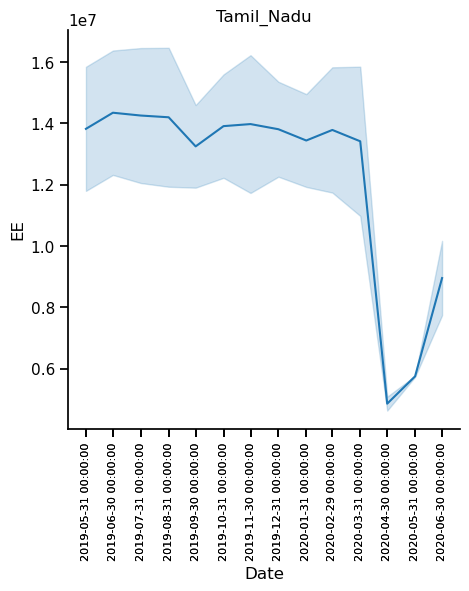

<Figure size 1000x500 with 0 Axes>

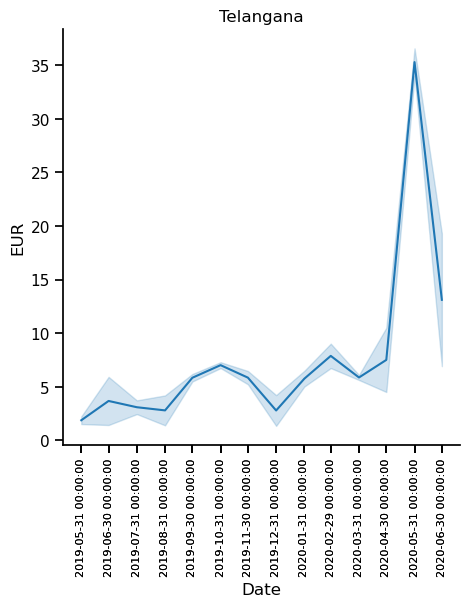

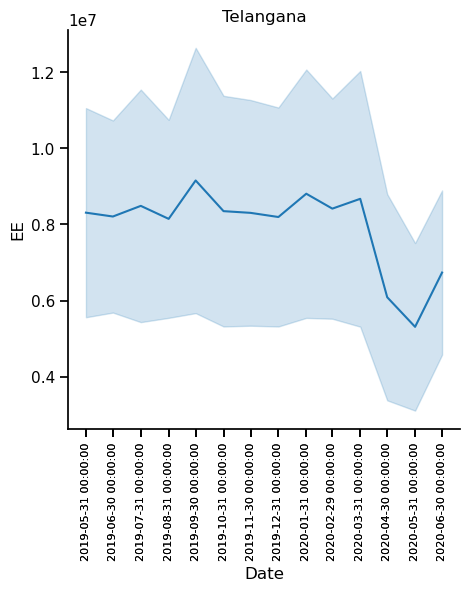

<Figure size 1000x500 with 0 Axes>

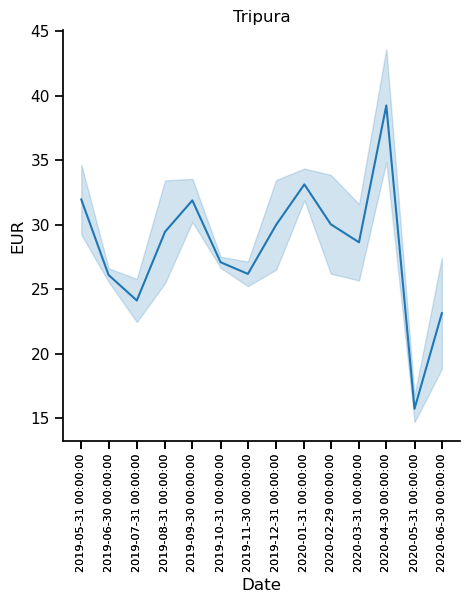

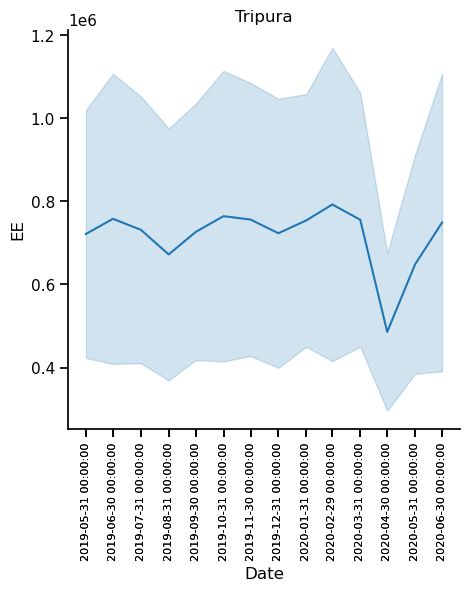

<Figure size 1000x500 with 0 Axes>

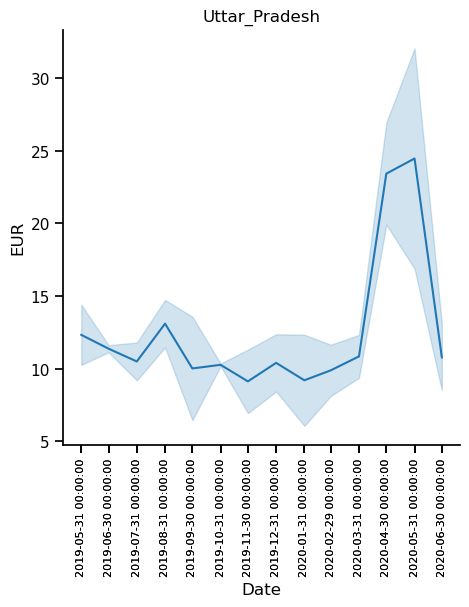

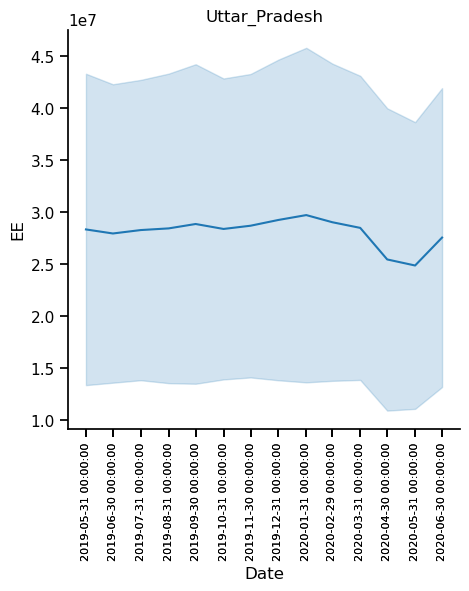

<Figure size 1000x500 with 0 Axes>

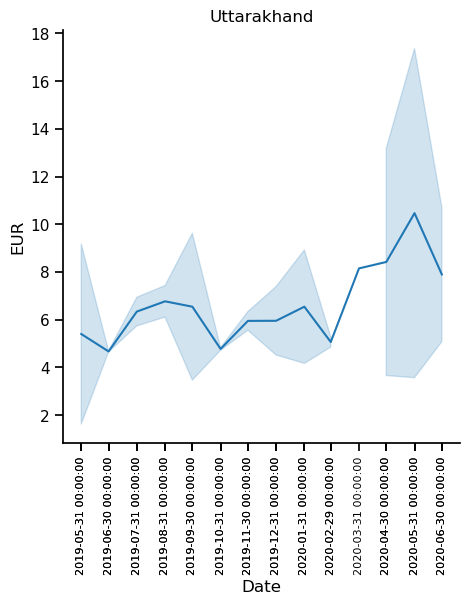

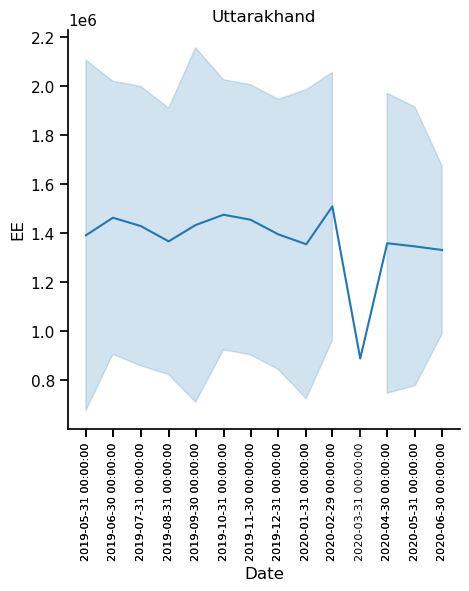

<Figure size 1000x500 with 0 Axes>

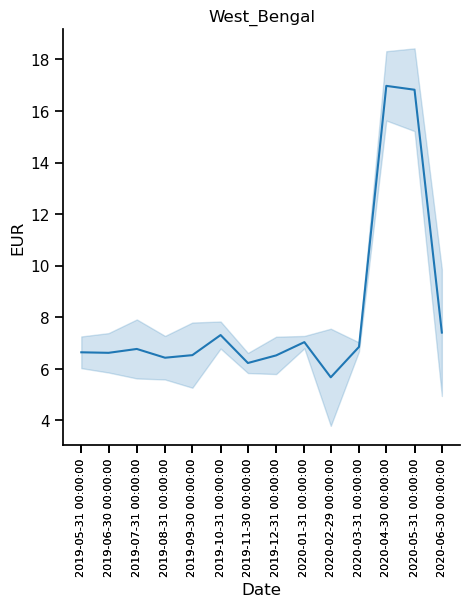

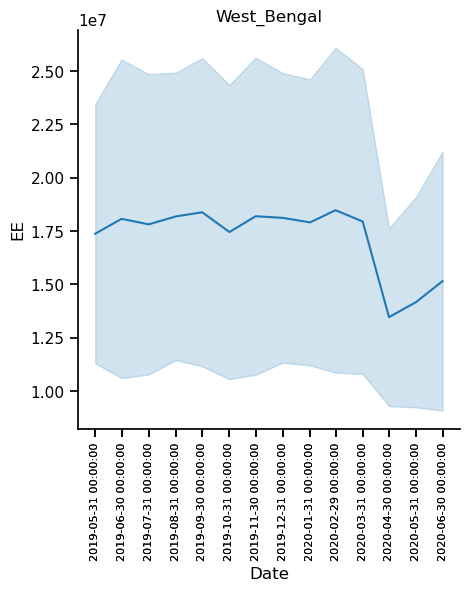

<Figure size 1000x500 with 0 Axes>

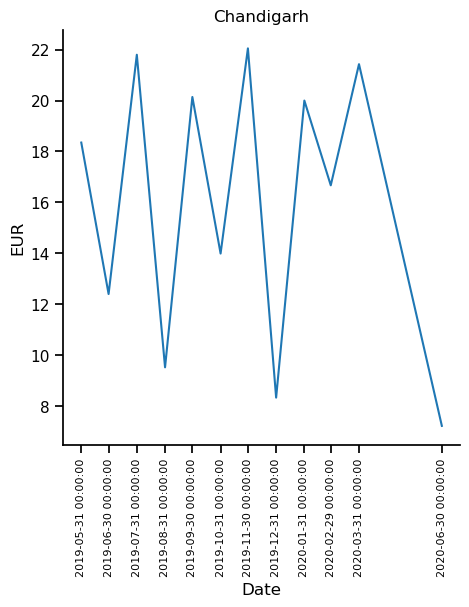

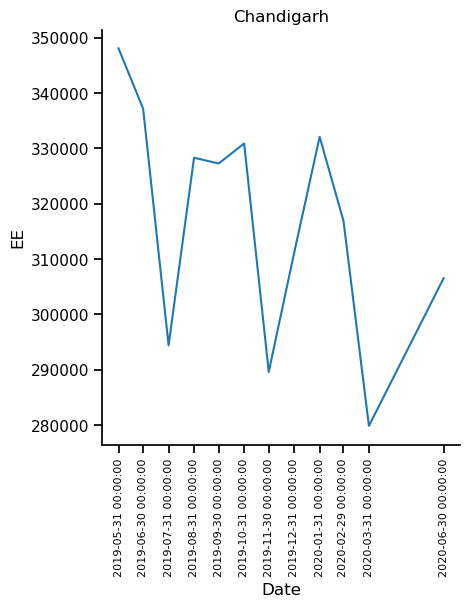

In [53]:
for i in state_list:
    plt.figure(figsize=(10,5))
    temp=df[df['State'] == i].reset_index(drop=True)
    g = sns.relplot(data=temp, kind="line",x="Date", y="EUR")
    plt.xticks(ticks=temp['Date'],labels=temp['Date'], rotation=90,fontsize=8);
    plt.title(i)
    g = sns.relplot(data=temp, kind="line",x="Date", y="EE")
    plt.xticks(ticks=temp['Date'],labels=temp['Date'], rotation=90,fontsize=8);
    plt.title(i)